In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df=pd.read_excel("C:/Users/HP/Downloads/pandas project datasets/subscriptiondatadisney.xlsx")
df

,User ID,Serial Number,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,c5ef7249-09ea-4c77-accc-d0ede4a0e196,687278bb-3847-4693-ae61-c671d0165ea5,Basic,68.78,2023-03-14,2024-03-08,UK,22,Male,Tablet,2 Years
1,95609aa8-afc1-4f88-9115-9f65576bfe25,a5aeca44-32d1-4cf0-937d-1fba3b55d382,Standard,37.75,2021-12-17,2023-01-18,France,25,Other,Mobile,1 Year
2,8df8f95e-7126-48c5-9596-5f0089800d8f,d4c4a30f-1c21-40ba-a121-0fcaf36f2989,Basic,72.81,2024-04-04,2024-05-28,USA,60,Other,Desktop,6 Months
3,90d7e0da-d2f5-4cb6-937c-5c1c043801bc,76f20b88-7c1f-42e1-baa4-372f523e7a14,Standard,65.72,2022-12-05,2023-11-06,USA,47,Female,Mobile,6 Months
4,e29e8d57-637e-4f0c-978a-831b7621e4f6,77073e5a-fd1e-413a-8664-05b8ef8d7801,Standard,42.92,2022-11-24,2023-09-17,France,53,Female,Mobile,2 Years
...,...,...,...,...,...,...,...,...,...,...,...
900,e343c6b1-6349-42e6-93d8-c22368d46788,539814fe-5922-46f9-a5cb-2703b01fc5be,Premium,58.40,2022-04-13,2023-01-06,Germany,55,Male,Desktop,2 Years
901,f235e879-8698-4745-b229-2b4fdb427723,b8867754-aa0b-4bca-b73a-dc6259b9eaea,Standard,61.64,2023-02-27,2023-08-11,Germany,37,Male,Tablet,1 Year
902,2ce0e1be-9509-41d4-b5b2-5b3e659473a8,e779238c-ef05-4810-9eed-d280e623d967,Basic,45.74,2022-01-05,2022-11-21,USA,58,Female,Tablet,1 Month
903,a5827fc7-ef47-4b67-afa1-27195b42a48a,26b642fe-aeaf-4114-b8dd-5571c6975fa3,Premium,57.74,2022-05-13,2022-07-27,UK,21,Male,Mobile,2 Years


In [112]:
df.shape

(905, 11)

In [7]:
df.info(

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            905 non-null    object        
 1   Serial Number      905 non-null    object        
 2   Subscription Type  905 non-null    object        
 3   Monthly Revenue    905 non-null    float64       
 4   Join Date          905 non-null    datetime64[ns]
 5   Last Payment Date  905 non-null    datetime64[ns]
 6   Country            905 non-null    object        
 7   Age                905 non-null    int64         
 8   Gender             905 non-null    object        
 9   Device             905 non-null    object        
 10  Plan Duration      905 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 77.9+ KB


In [18]:
df.duplicated(subset='Serial Number').sum()

0

In [113]:
df.describe()

,Monthly Revenue,Join Date,Last Payment Date,Age
count,905.00000,905,905,905.000000
mean,53.34358,2022-12-05 00:17:30.165745664,2023-09-09 01:45:00.994475008,44.048619
min,5.03000,2021-06-18 00:00:00,2021-08-08 00:00:00,18.000000
25%,29.52000,2022-03-09 00:00:00,2023-04-25 00:00:00,31.000000
50%,53.10000,2022-11-29 00:00:00,2023-11-17 00:00:00,45.000000
75%,78.27000,2023-09-06 00:00:00,2024-03-26 00:00:00,57.000000
max,99.98000,2024-06-17 00:00:00,2024-06-17 00:00:00,69.000000
std,28.02066,NaN,NaN,15.362142


In [125]:
#date range 
date_range=(df['Last Payment Date'].min(),df['Last Payment Date'].max())
date_range

(Timestamp('2021-08-08 00:00:00'), Timestamp('2024-06-17 00:00:00'))

In [32]:
#times-->subscription--->purchased-->subscription type wise
most_taken_subs=df.groupby('Subscription Type').count().reset_index().rename(columns={'User ID':'times_subs_taken'})[['Subscription Type','times_subs_taken']]
most_taken_subs.sort_values(by='times_subs_taken',ascending=False)

,Subscription Type,times_subs_taken
0,Basic,316
2,Standard,298
1,Premium,291


In [168]:
#total monthly revenue by subscripton type wise 

total_revenue=df.groupby('Subscription Type')['Monthly Revenue'].sum().reset_index().rename(columns={'Monthly Revenue':'Total Revenue'
}).sort_values(by='Total Revenue',ascending=False)
total_revenue

,Subscription Type,Total Revenue
2,Standard,17057.91
0,Basic,15644.99
1,Premium,15573.04


In [176]:
#subscribers per country
subscribers_per_country = df['Country'].value_counts()
print("Subscribers per country:\n", subscribers_per_country)


Subscribers per country:
 Country
USA        173
Germany    155
India      144
UK         140
France     140
Canada     135
Unknown     18
Name: count, dtype: int64


In [53]:
num_gender=df.groupby(['Gender','Subscription Type']).count().reset_index().rename(columns={'User ID':'count'})[['Gender','Subscription Type','count']]
type_gwise=num_gender.sort_values(by=['Gender','count'],ascending=[True,False])
type_gwise

,Gender,Subscription Type,count
0,Female,Basic,105
1,Female,Premium,95
2,Female,Standard,93
3,Male,Basic,115
5,Male,Standard,112
4,Male,Premium,91
7,Other,Premium,105
6,Other,Basic,96
8,Other,Standard,93


<Axes: xlabel='Gender', ylabel='count'>

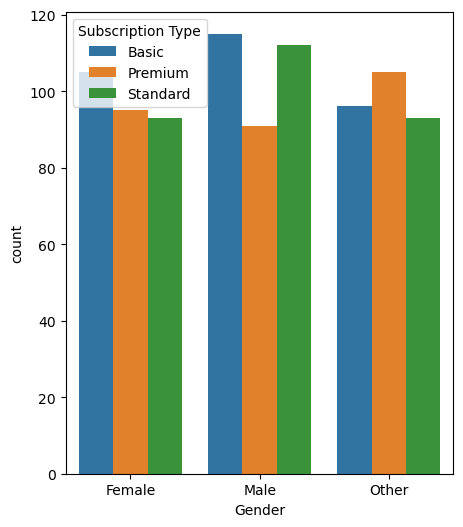

In [66]:
plt.figure(figsize=(5,6))
sns.barplot(data=type_gwise,x='Gender',y='count',hue='Subscription Type')

In [67]:
#mostly type of subscription purchased ---> gender wise 
most_gwise=num_gender.sort_values(by=['Gender','count'],ascending=[True,False]).drop_duplicates(subset=['Gender'])
most_gwise

,Gender,Subscription Type,count
0,Female,Basic,105
3,Male,Basic,115
7,Other,Premium,105


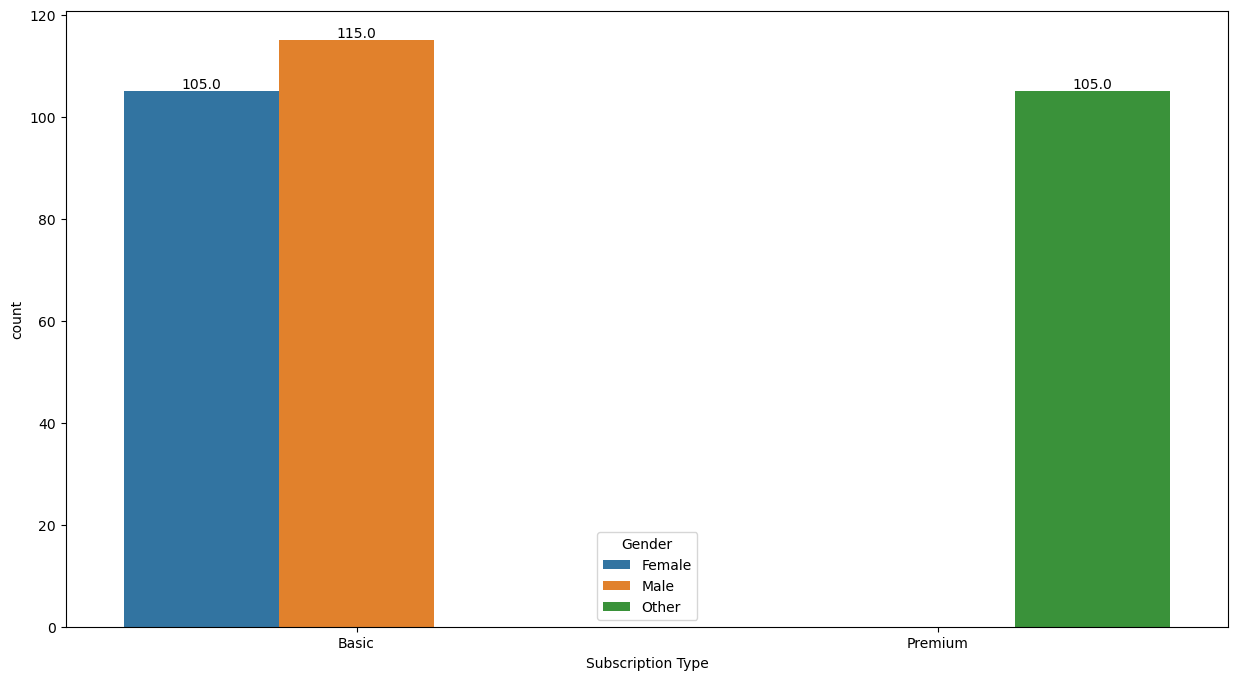

In [92]:
plt.figure(figsize=(15,8))
sns.barplot(data=most_gwise,x='Subscription Type',y='count',hue='Gender')
ax=plt.gca()
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')
    


In [105]:
#country wise most purchased subscription type 

df.groupby(['Subscription Type','Country']).count().reset_index().rename(columns={'User ID':'count'})[['Subscription Type','Country','count']].sort_values(by=['Subscription Type','count'],ascending=[True,False]).drop_duplicates(subset=['Subscription Type'])

,Subscription Type,Country,count
0,Basic,Canada,61
12,Premium,USA,62
19,Standard,USA,59


In [183]:
#subscription type correlate with plan duration
subscription_type_vs_duration = pd.crosstab(df['Subscription Type'], df['Plan Duration'])
print("Subscription type vs plan duration:\n", subscription_type_vs_duration)


Subscription type vs plan duration:
 Plan Duration      1 Month  1 Year  2 Years  6 Months
Subscription Type                                    
Basic                   81      75       87        73
Premium                 70      68       75        78
Standard                75      73       78        72


In [110]:
#plan duration purchase count on the basis on subscription type 

df.groupby(['Subscription Type','Plan Duration']).count().reset_index().rename(columns={'User ID':'count'})[['Subscription Type','Plan Duration','count']].sort_values(by=['Subscription Type','count'],ascending=[True,False])

,Subscription Type,Plan Duration,count
2,Basic,2 Years,87
0,Basic,1 Month,81
1,Basic,1 Year,75
3,Basic,6 Months,73
7,Premium,6 Months,78
6,Premium,2 Years,75
4,Premium,1 Month,70
5,Premium,1 Year,68
10,Standard,2 Years,78
8,Standard,1 Month,75


In [111]:
df

,User ID,Serial Number,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,c5ef7249-09ea-4c77-accc-d0ede4a0e196,687278bb-3847-4693-ae61-c671d0165ea5,Basic,68.78,2023-03-14,2024-03-08,UK,22,Male,Tablet,2 Years
1,95609aa8-afc1-4f88-9115-9f65576bfe25,a5aeca44-32d1-4cf0-937d-1fba3b55d382,Standard,37.75,2021-12-17,2023-01-18,France,25,Other,Mobile,1 Year
2,8df8f95e-7126-48c5-9596-5f0089800d8f,d4c4a30f-1c21-40ba-a121-0fcaf36f2989,Basic,72.81,2024-04-04,2024-05-28,USA,60,Other,Desktop,6 Months
3,90d7e0da-d2f5-4cb6-937c-5c1c043801bc,76f20b88-7c1f-42e1-baa4-372f523e7a14,Standard,65.72,2022-12-05,2023-11-06,USA,47,Female,Mobile,6 Months
4,e29e8d57-637e-4f0c-978a-831b7621e4f6,77073e5a-fd1e-413a-8664-05b8ef8d7801,Standard,42.92,2022-11-24,2023-09-17,France,53,Female,Mobile,2 Years
...,...,...,...,...,...,...,...,...,...,...,...
900,e343c6b1-6349-42e6-93d8-c22368d46788,539814fe-5922-46f9-a5cb-2703b01fc5be,Premium,58.40,2022-04-13,2023-01-06,Germany,55,Male,Desktop,2 Years
901,f235e879-8698-4745-b229-2b4fdb427723,b8867754-aa0b-4bca-b73a-dc6259b9eaea,Standard,61.64,2023-02-27,2023-08-11,Germany,37,Male,Tablet,1 Year
902,2ce0e1be-9509-41d4-b5b2-5b3e659473a8,e779238c-ef05-4810-9eed-d280e623d967,Basic,45.74,2022-01-05,2022-11-21,USA,58,Female,Tablet,1 Month
903,a5827fc7-ef47-4b67-afa1-27195b42a48a,26b642fe-aeaf-4114-b8dd-5571c6975fa3,Premium,57.74,2022-05-13,2022-07-27,UK,21,Male,Mobile,2 Years


In [116]:
#revenue --->country wise

df.groupby('Country')['Monthly Revenue'].sum().reset_index().sort_values(by='Monthly Revenue',ascending=False)

,Country,Monthly Revenue
5,USA,8892.66
2,Germany,8227.42
1,France,7955.76
0,Canada,7576.59
3,India,7334.07
4,UK,7200.70
6,Unknown,1088.74


In [122]:
#revenue--->country--->subscription type
df.groupby(['Country','Subscription Type'])['Monthly Revenue'].sum().reset_index().sort_values(by=['Country','Monthly Revenue'],ascending=[True,False])

,Country,Subscription Type,Monthly Revenue
0,Canada,Basic,3098.58
1,Canada,Premium,2605.21
2,Canada,Standard,1872.80
5,France,Standard,3017.50
4,France,Premium,2480.67
3,France,Basic,2457.59
8,Germany,Standard,2914.71
7,Germany,Premium,2870.85
6,Germany,Basic,2441.86
11,India,Standard,2851.83


In [139]:
#new susbcriptions per month
df['subscription_month']=df['Last Payment Date'].dt.to_period('M')
subs_month=df.groupby('subscription_month')['User ID'].nunique().reset_index().rename(columns={'User ID':'num_subs'})
subs_month

,subscription_month,num_subs
0,2021-08,1
1,2021-09,3
2,2021-10,3
3,2021-11,9
4,2021-12,4
5,2022-01,6
6,2022-02,4
7,2022-03,5
8,2022-04,10
9,2022-05,9


<Figure size 1500x1200 with 0 Axes>

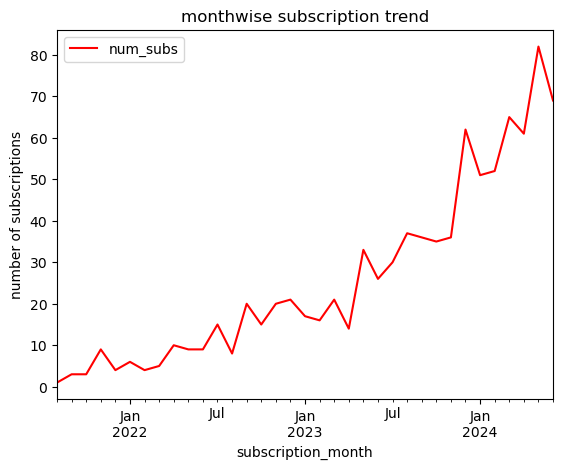

In [149]:
plt.figure(figsize=(15,12))
subs_month.plot(kind='line',x='subscription_month',y='num_subs',color='r')
plt.ylabel('number of subscriptions')
plt.title('monthwise subscription trend')
plt.show()

In [156]:
#peak months for the subscriptions 
subs_month.sort_values(by='num_subs',ascending=False).head()

,subscription_month,num_subs
33,2024-05,82
34,2024-06,69
31,2024-03,65
28,2023-12,62
32,2024-04,61


In [161]:
#average rate of monthly revenue change over time 
avg_month_revenue=df.groupby('subscription_month')['Monthly Revenue'].mean().reset_index().rename(columns={'Monthly Revenue':'avg_monthly_revenue'})
avg_month_revenue

,subscription_month,avg_monthly_revenue
0,2021-08,50.920000
1,2021-09,43.903333
2,2021-10,44.340000
3,2021-11,56.867778
4,2021-12,50.712500
5,2022-01,76.600000
6,2022-02,74.617500
7,2022-03,56.610000
8,2022-04,49.480000
9,2022-05,52.485556


Text(0.5, 1.0, 'average rate of monthly revenue change over time')

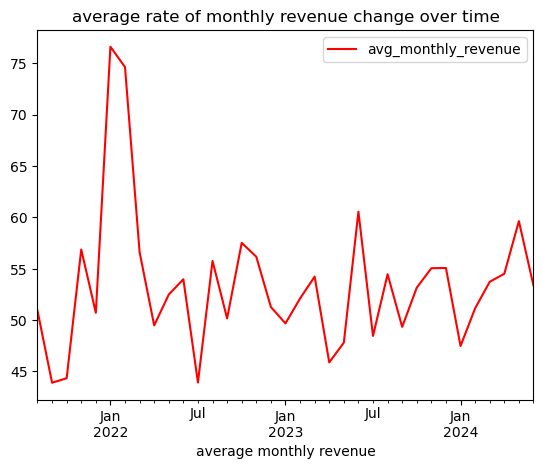

In [164]:
avg_month_revenue.plot(kind='line',x='subscription_month',y='avg_monthly_revenue',color='r')
plt.xlabel('average monthly revenue')
plt.title('average rate of monthly revenue change over time')

In [166]:
avg_month_revenue.sort_values(by='avg_monthly_revenue',ascending=False).head()

,subscription_month,avg_monthly_revenue
5,2022-01,76.600000
6,2022-02,74.617500
22,2023-06,60.547308
33,2024-05,59.629024
14,2022-10,57.514000


In [169]:
#average age of subscribers
average_age = df['Age'].mean()
print("Average age of subscribers:", average_age)


Average age of subscribers: 44.04861878453039


In [170]:
#age distribution vary across different subscription types
age_distribution_per_type = df.groupby('Subscription Type')['Age'].describe()
print("Age distribution per subscription type:\n", age_distribution_per_type)


Age distribution per subscription type:
                    count       mean        std   min   25%   50%   75%   max
Subscription Type                                                           
Basic              316.0  44.113924  15.786060  18.0  31.0  44.0  58.0  69.0
Premium            291.0  44.828179  15.286619  18.0  31.0  48.0  58.0  69.0
Standard           298.0  43.218121  14.984933  18.0  30.0  42.5  56.0  69.0


In [174]:
# average time between join date and last payment date
average_time_between_dates = (df['Last Payment Date'] - df['Join Date']).mean()
average_time_between_dates

Timedelta('278 days 01:27:30.828729280')

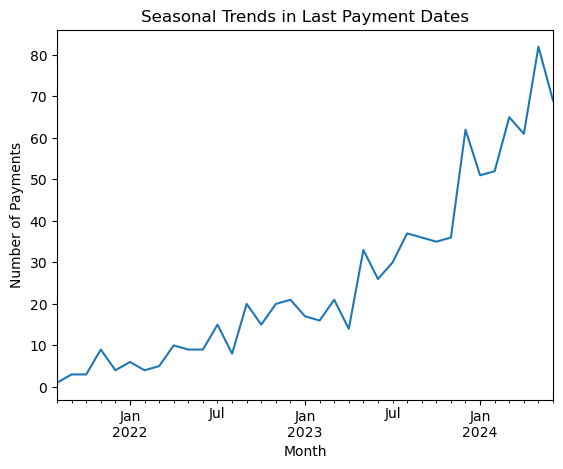

In [179]:
#seasonal trend in the last payment date
payment_date_distribution = df['Last Payment Date'].dt.to_period('M').value_counts().sort_index()
payment_date_distribution.plot(kind='line', title='Seasonal Trends in Last Payment Dates')
plt.xlabel('Month')
plt.ylabel('Number of Payments')
plt.show()


Demographic Analysis:
 Country                   Canada  France  Germany  India    UK   USA  Unknown
Subscription Type Gender                                                     
Basic             Female    15.0    19.0     18.0   18.0  17.0  17.0      1.0
                  Male      29.0    12.0     22.0   14.0  17.0  18.0      3.0
                  Other     17.0    14.0     15.0   20.0  11.0  17.0      2.0
Premium           Female    13.0    12.0     17.0   15.0  14.0  20.0      4.0
                  Male      11.0    16.0     14.0   14.0  16.0  18.0      2.0
                  Other     20.0    14.0     21.0   10.0  13.0  24.0      3.0
Standard          Female     8.0    18.0     11.0   18.0  17.0  20.0      1.0
                  Male       9.0    19.0     21.0   16.0  21.0  24.0      2.0
                  Other     13.0    16.0     16.0   19.0  14.0  15.0      NaN


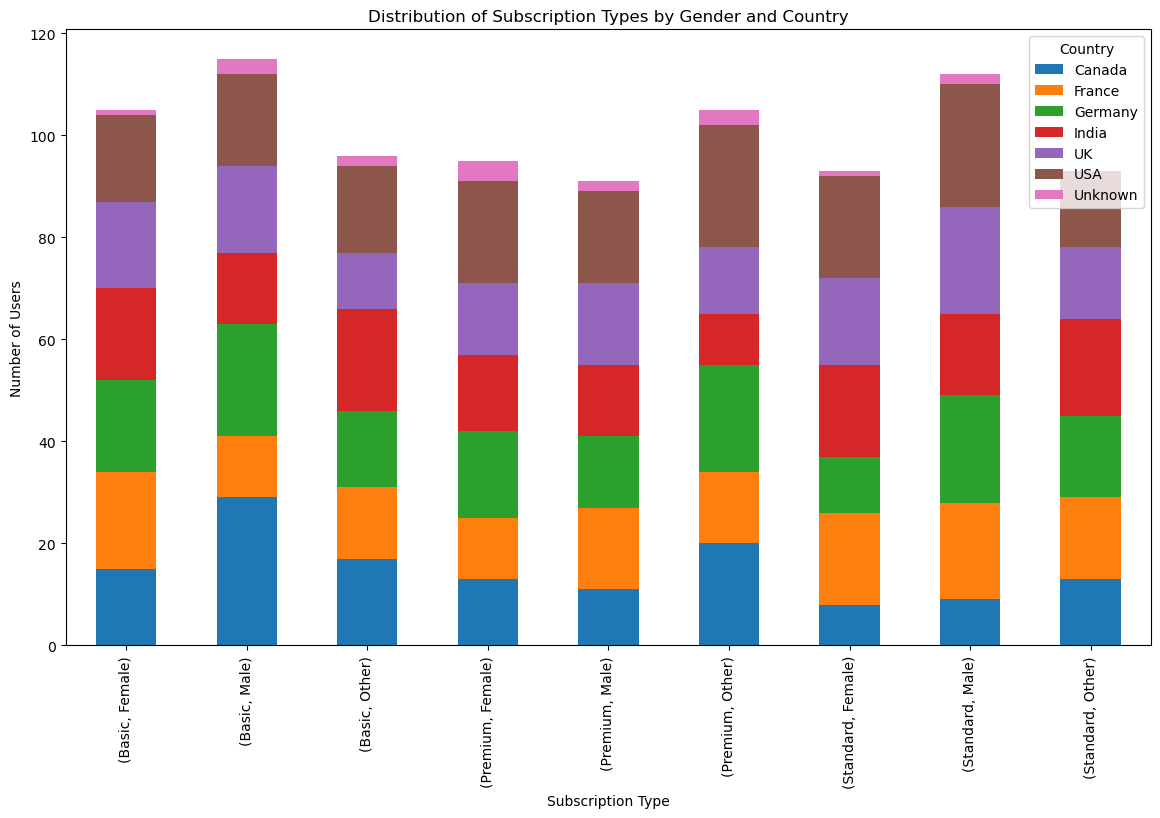

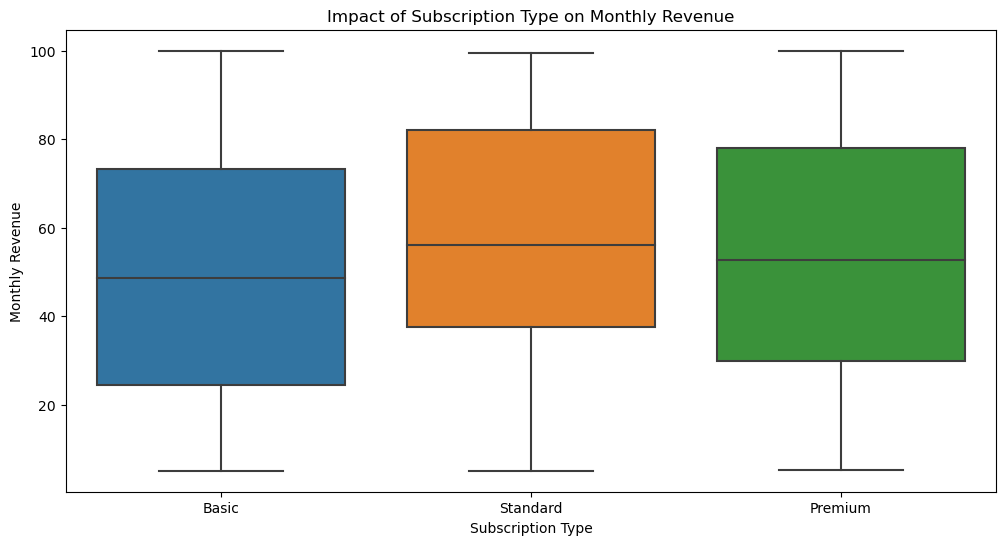

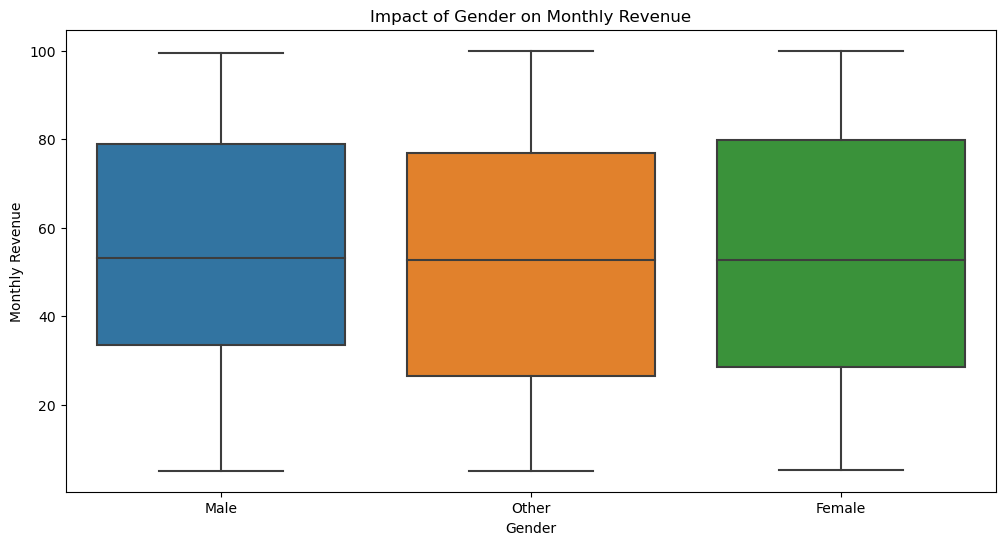

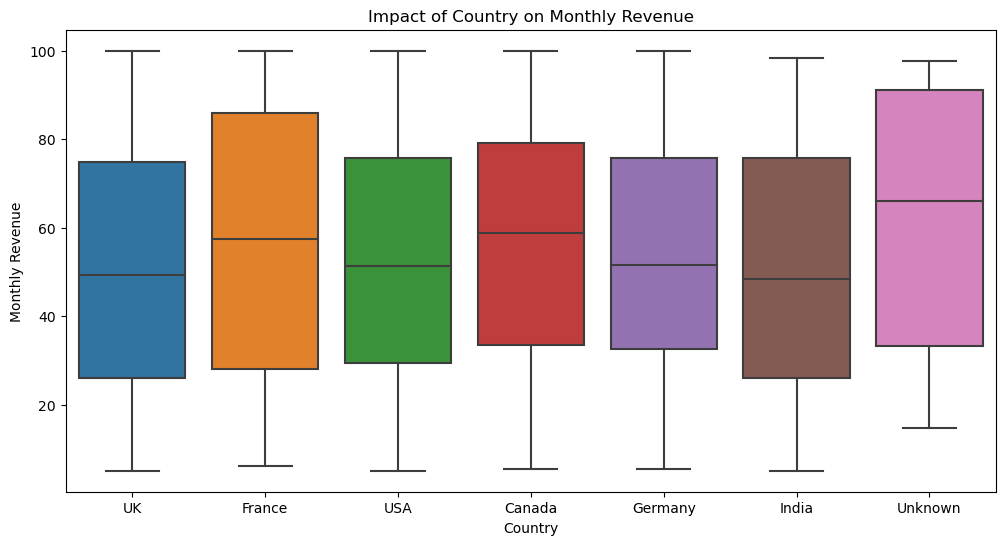

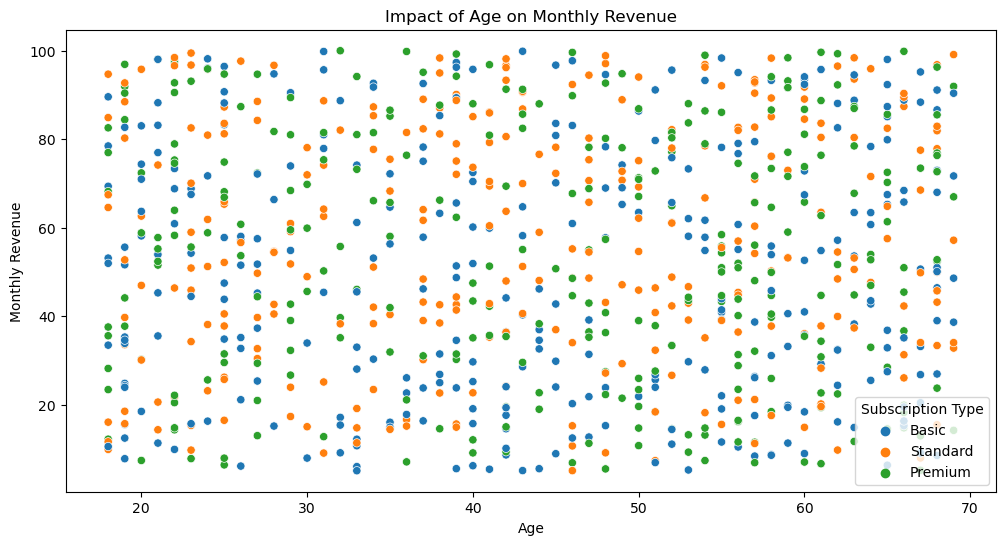

In [197]:
#  age, gender, and country impact subscription type and monthly revenue

demographic_analysis = df.groupby(['Subscription Type', 'Gender', 'Country'])['User ID'].count().unstack()

print("Demographic Analysis:\n", demographic_analysis)

# Plot demographic analysis
demographic_analysis.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Distribution of Subscription Types by Gender and Country')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.show()

# Impact of age on monthly revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='Subscription Type', y='Monthly Revenue', data=data)
plt.title('Impact of Subscription Type on Monthly Revenue')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Monthly Revenue', data=data)
plt.title('Impact of Gender on Monthly Revenue')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Monthly Revenue', data=data)
plt.title('Impact of Country on Monthly Revenue')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Monthly Revenue', hue='Subscription Type', data=data)
plt.title('Impact of Age on Monthly Revenue')
plt.show()


In [186]:
# How do retention rates vary over different cohorts based on join date?

def get_cohort(df, column_name):
    df['Cohort Month'] = df[column_name].dt.to_period('M')
    df['Join Month'] = df[column_name].dt.to_period('M')
    return df

data = get_cohort(df, 'Join Date')


cohort_data = df.groupby(['Cohort Month', 'Join Month']).size().unstack(fill_value=0)

cohort_data = cohort_data.div(cohort_data.iloc[:, 0], axis=0)

print("Cohort Analysis:\n", cohort_data)


Cohort Analysis:
 Join Month    2021-06  2021-07  2021-08  2021-09  2021-10  2021-11  2021-12  \
Cohort Month                                                                  
2021-06           1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2021-07           NaN      inf      NaN      NaN      NaN      NaN      NaN   
2021-08           NaN      NaN      inf      NaN      NaN      NaN      NaN   
2021-09           NaN      NaN      NaN      inf      NaN      NaN      NaN   
2021-10           NaN      NaN      NaN      NaN      inf      NaN      NaN   
2021-11           NaN      NaN      NaN      NaN      NaN      inf      NaN   
2021-12           NaN      NaN      NaN      NaN      NaN      NaN      inf   
2022-01           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-02           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-03           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-04           NaN      NaN    

In [190]:
# the average Customer Lifetime Value (CLV) for different subscription types
data['Plan Duration'] = df['Plan Duration'].str.extract('(\d+)')[0].astype(int)

# Calculate lifetime revenue per user
data['Lifetime Revenue'] = df['Monthly Revenue'] * df['Plan Duration']

# Calculate CLV per subscription type
clv_per_subscription_type = df.groupby('Subscription Type')['Lifetime Revenue'].mean()
print("Customer Lifetime Value (CLV) per subscription type:\n", clv_per_subscription_type)



Customer Lifetime Value (CLV) per subscription type:
 Subscription Type
Basic       117.028165
Premium     137.462749
Standard    139.687685
Name: Lifetime Revenue, dtype: float64


In [191]:
# predict churn based on user demographics and subscription details

#  the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a churn column (assuming churned if last payment date is over a month ago)
df['Churn'] = (df['Last Payment Date'] < pd.Timestamp.today() - pd.DateOffset(months=1)).astype(int)

# Prepare features and target
features = df[['Subscription Type', 'Monthly Revenue', 'Country', 'Age', 'Gender', 'Device', 'Plan Duration']]
features = pd.get_dummies(features, drop_first=True)
target = data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Churn Prediction Report:\n", classification_report(y_test, y_pred))


Churn Prediction Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.89      1.00      0.94       242

    accuracy                           0.89       272
   macro avg       0.44      0.50      0.47       272
weighted avg       0.79      0.89      0.84       272



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Revenue Forecast for next 6 months:
 2024-07     882.824017
2024-08    1219.122961
2024-09    1180.669154
2024-10     994.138583
2024-11    1021.735322
2024-12    1334.267916
Freq: M, dtype: float64


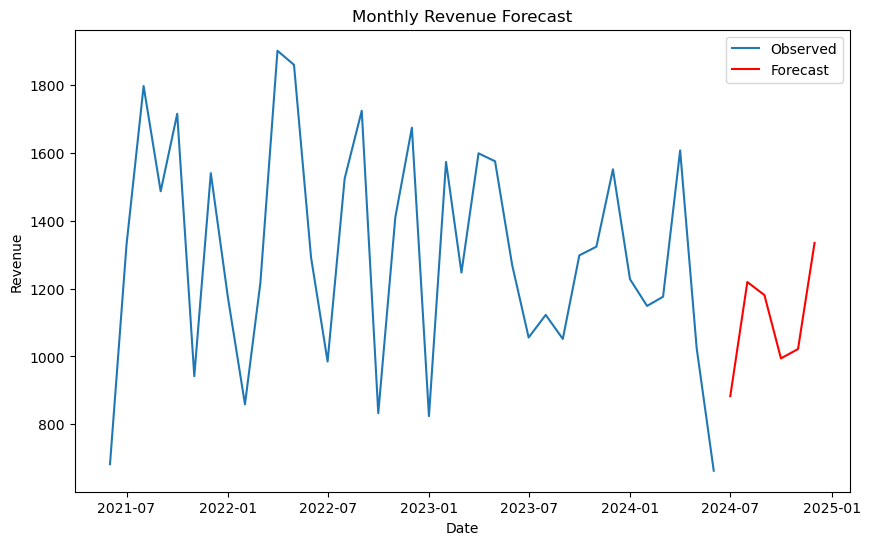

In [192]:
# Can we forecast the monthly revenue for the next 6 months?
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Aggregate monthly revenue
monthly_revenue = df.groupby(data['Join Date'].dt.to_period('M'))['Monthly Revenue'].sum()

# Fit the model
model = ExponentialSmoothing(monthly_revenue, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 6 months
forecast = model.forecast(6)
print("Revenue Forecast for next 6 months:\n", forecast)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index.to_timestamp(), monthly_revenue, label='Observed')
plt.plot(forecast.index.to_timestamp(), forecast, label='Forecast', color='red')
plt.title('Monthly Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()



# Conclusions

Basic is the most popular and profitable subscription type.

Males predominantly prefer Basic over other options.

India has the highest number of subscribers, contributing significantly to revenue.

Monthly revenue is expected to rise steadily over the next six months.

The Random Forest model effectively identifies potential churners, aiding in retention strategies.